# K Nearest Neighbors Classification

KNN classfication works by using the classes of the k closest points in order to make a prediction of the class for the new unseen instance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Data Preparation

In [3]:
iris = sns.load_dataset('iris')
# shuffle the dataset
iris = iris.sample(frac=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
62,6.0,2.2,4.0,1.0,versicolor
144,6.7,3.3,5.7,2.5,virginica
66,5.6,3.0,4.5,1.5,versicolor


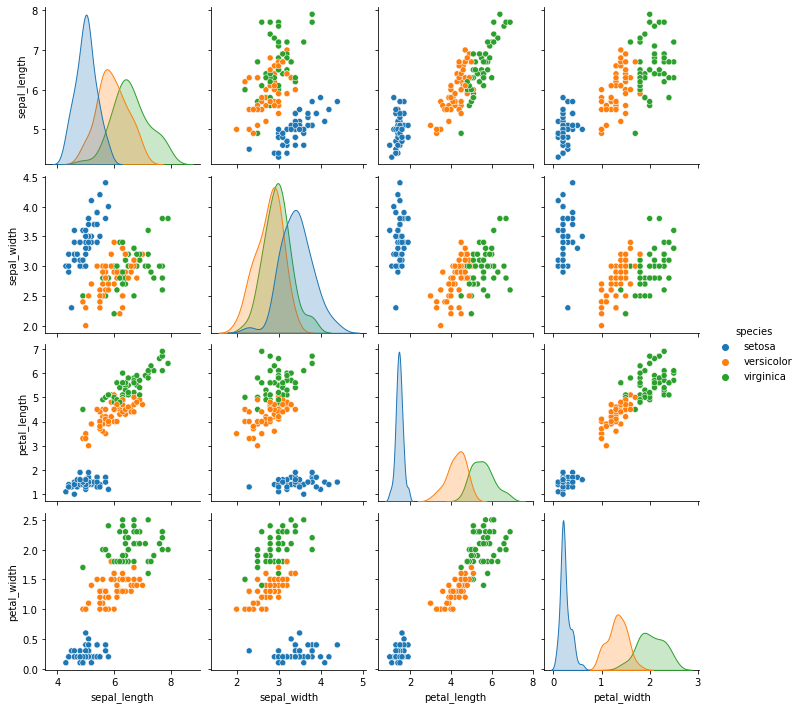

In [4]:
sns.pairplot(iris, hue='species');

In [5]:
features = iris.columns[:-1]

X = iris.drop(columns='species').values
y = iris['species'].values

print('Features:', list(features))
print()
print(X[:5])
print()
print(y[:5])

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[[4.6 3.2 1.4 0.2]
 [5.  3.4 1.6 0.4]
 [6.  2.2 4.  1. ]
 [6.7 3.3 5.7 2.5]
 [5.6 3.  4.5 1.5]]

['setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (112, 4)
X_test: (38, 4)

y_train: (112,)
y_test: (38,)


# Distance metrics

Minkowski distance is a metric that measures the distance between two n-dimensional points.

For $\vec{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n\end{pmatrix} $ and $\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{pmatrix}$ the Minkowski distance of order $p \ge 1$  for $\vec{x}$ and $\vec{y}$ is given by:

$$
D(\vec{x}, \vec{y}) = \bigg(\sum_{i=1}^n|x_i - y_i|^p\bigg)^{1/p}
$$

Minkowski distance is a generalization of Manhattan ($p=1$) and Euclidean ($p=2$) distances.

In [7]:
# Find the distance between the given instance
# and all points in the training set
instance = X_test[0]
target = y_test[0]

print(instance, '\t', target)

[4.8 3.  1.4 0.1] 	 setosa


In [8]:
# minkowski distances for p = 1, 2, 3
dist1 = (np.abs(X_train - instance) ** 1).sum(axis=1) ** (1/1)
dist2 = (np.abs(X_train - instance) ** 2).sum(axis=1) ** (1/2)
dist3 = (np.abs(X_train - instance) ** 3).sum(axis=1) ** (1/3)

print('p = 1:', dist1[:5])
print()
print('p = 2:', dist2[:5])
print()
print('p = 3:', dist3[:5])

p = 1: [5.3 6.5 4.7 1.  0.8]

p = 2: [3.49428104 4.21781934 2.75862284 0.6164414  0.46904158]

p = 3: [3.20905638 3.84618163 2.48702612 0.54288352 0.41983365]


# The Closest K points

In [9]:
k = 5

dist1_sorted_indx = dist1.argsort()
dist2_sorted_indx = dist2.argsort()
dist3_sorted_indx = dist3.argsort()

closest_k1 = dist1_sorted_indx[:k]
closest_k2 = dist2_sorted_indx[:k]
closest_k3 = dist3_sorted_indx[:k]

In [10]:
dist1[dist1_sorted_indx[:5]]

array([0.2, 0.3, 0.4, 0.5, 0.5])

In [11]:
print('The closest', k, 'points.\n')
print('p = 1:', closest_k1)
print('p = 2:', closest_k2)
print('p = 3:', closest_k3)

The closest 5 points.

p = 1: [59 16 66 55 83]
p = 2: [16 59 66 83 15]
p = 3: [16 66 59 83 15]


In [12]:
print('The classes of the closest', k, 'points.\n')
print(y_train[closest_k1])
print(y_train[closest_k2])
print(y_train[closest_k3])

The classes of the closest 5 points.

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# Encoding the labels

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labeler = LabelEncoder()
labeler.fit(y_train)
for label, code in zip(labeler.classes_, range(3)):
    print(f'{label:12}{code}')

setosa      0
versicolor  1
virginica   2


In [15]:
# transform the targets to their encoding
y_train = labeler.transform(y_train)
y_test = labeler.transform(y_test)

In [16]:
y_test

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0])

In [17]:
y_train[closest_k1]

array([0, 0, 0, 0, 0])

In [18]:
y_train[dist1_sorted_indx[:10]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
from scipy.stats import mode

In [20]:
labeler.inverse_transform(mode(y_train[closest_k1]).mode)

array(['setosa'], dtype=object)

# Batch predictions

In [21]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [22]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [23]:
p = 2

# Every train instance - every test instance
dist2 = (np.abs(X_train - X_test[:,np.newaxis,:]) ** p).sum(axis=2)
# each row is an instance from X_test 
# each column is the distance from the instance 
# in X_test to each instance from X_train
dist2.shape

(38, 112)

In [24]:
# sort each row
dist2_indx = dist2.argsort()
dist2_indx

array([[ 16,  59,  66, ...,  56,  88,  27],
       [111,  37,  52, ...,  87,  28,  64],
       [103, 106,   3, ...,  56,  27,  88],
       ...,
       [ 89,  13,  74, ...,  44,   4,  28],
       [ 13,  89,  74, ...,  44,   4,  28],
       [ 25,  11,   3, ...,  56,  88,  27]], dtype=int64)

In [25]:
# the classes of the closest 5 points
closest5 = y_train[dist2_indx][:,:5]
closest5

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 1, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [26]:
preds = labeler.inverse_transform(mode(closest5, axis=1).mode.ravel())
preds

array(['setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [27]:
y_test = labeler.inverse_transform(y_test)
y_test

array(['setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [28]:
y_train = labeler.inverse_transform(y_train)

In [29]:
(preds == y_test).mean()

0.9736842105263158

In [30]:
y_test

array(['setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [31]:
from knn import KNNClassifier

In [32]:
knn = KNNClassifier()

knn.fit(X_train, y_train)

preds = knn.predict(X_test)
preds = preds.flatten()
preds

array(['setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [33]:
(y_test == preds).mean()

0.9736842105263158

# Adding weights

Earlier the class of the instance would be chosen by a majority vote. Now we take the distance of the points from the instance into account when deciding the class. 

We do this by giving each point its own weight inversely proportional to its distance from the given instance. In other words, points closer to the instance will be given a higher weight while points farther away will receive a lower weight.

We then add up the weights of all the points in each class and the class with the highest combined weight is chosen as the prediction.

In [34]:
dist2.shape, dist2_indx.shape

((38, 112), (38, 112))

In [35]:
np.where(y_train == 'virginica')

(array([  1,   5,   6,   9,  10,  14,  18,  19,  23,  24,  27,  33,  35,
         36,  40,  42,  43,  48,  50,  51,  54,  56,  57,  61,  62,  63,
         67,  68,  69,  71,  73,  77,  80,  81,  82,  86,  88,  91, 102],
       dtype=int64),)

In [36]:
dist2_indx

array([[ 16,  59,  66, ...,  56,  88,  27],
       [111,  37,  52, ...,  87,  28,  64],
       [103, 106,   3, ...,  56,  27,  88],
       ...,
       [ 89,  13,  74, ...,  44,   4,  28],
       [ 13,  89,  74, ...,  44,   4,  28],
       [ 25,  11,   3, ...,  56,  88,  27]], dtype=int64)

In [37]:
sorted_dist2 = np.sort(dist2)
sorted_dist2.argsort()

array([[  0,   1,   2, ..., 109, 110, 111],
       [  0,   1,   2, ..., 109, 110, 111],
       [  0,   1,   2, ..., 109, 110, 111],
       ...,
       [  0,   1,   2, ..., 109, 110, 111],
       [  0,   1,   2, ..., 109, 110, 111],
       [  0,   1,   2, ..., 109, 110, 111]], dtype=int64)

In [38]:
sorted_dist2[:,:5][:,np.where(y_train[dist2_indx[3,:5]] == 'setosa')]

array([], shape=(38, 1, 0), dtype=float64)